# **Data engineering:** 

Procesar la fuente de datos de manera que pueda ser consumida por algoritmos en Python

Justificar decisiones de procesamiento, manejo de campos vacíos, manejo de variables, manejo de la target variable.

In [74]:
# Importando las librerías para el data engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# Importando la carpeta en google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/Colab Notebooks/Acomodación'
%ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Acomodación
clean_data.csv       prediction_model.h5              train_data.txt
DataAcomodacion.csv  prediction_Tipo_Acomodacion.csv


In [76]:
# Guardamos el archivo de entrenamiento en una lista
data_file = []
file = open('train_data.txt', 'r')
for line in file:
    row = line.rstrip('\\n')
    row = row.replace('\n', '')
    row = row.replace('[REG] ', '')
    data_file.append(row)
file.close()
print(data_file[:20])

['"Registro 1"', '1010286', '7', 'F', '40', '0', 'COL', 'AirBnB', '"Registro 2"', '1000152', '5', 'M', '<NA>', '0', '<NA>', 'AirBnB', '"Registro 3"', '1009019', '4', 'F']


De los primeros 20 datos podemos ver que cada conjunto de datos está compuesto de 8 columnas, así que, el siguiente paso es generar un código para obtener estas 8 columnas.

In [77]:
data_set = []

for i in range(0, 8):
    data_set.append(data_file[i::8])

In [78]:
df = pd.DataFrame(data_set)
df = df.T
df.head()

,0,1,2,3,4,5,6,7
0,"""Registro 1""",1010286,7,F,40,0,COL,AirBnB
1,"""Registro 2""",1000152,5,M,<NA>,0,<NA>,AirBnB
2,"""Registro 3""",1009019,4,F,39,1,ES,Hotel
3,"""Registro 4""",1007840,5,F,45,0,NL,Hotel
4,"""Registro 5""",1006939,5,M,45,1,UK,Hotel


Renombramos las columnas de la siguiente manera.
* Id
* Unknown (pensaba que eran códigos postales, pero al buscarlos en google no me brindaban un código postal válido, demás que el código postal tiene un máximo de 6 dígitos, estos valores tienen 7).
* days_of_stay
* genre
* age
* kids
* destination
* accommodation_type


In [79]:
rename_columns = ['id','unknown','days_of_stay','genre','age','kids','destination','accommodation_type']

df.columns = rename_columns
df.head(10)

,id,unknown,days_of_stay,genre,age,kids,destination,accommodation_type
0,"""Registro 1""",1010286,7,F,40,0,COL,AirBnB
1,"""Registro 2""",1000152,5,M,<NA>,0,<NA>,AirBnB
2,"""Registro 3""",1009019,4,F,39,1,ES,Hotel
3,"""Registro 4""",1007840,5,F,45,0,NL,Hotel
4,"""Registro 5""",1006939,5,M,45,1,UK,Hotel
5,"""Registro 6""",1008812,7,F,47,1,IT,AirBnB
6,"""Registro 7""",1013918,3,F,53,0,NL,Hotel
7,"""Registro 8""",1005722,2,F,47,0,AR,Hotel
8,"""Registro 9""",1003006,3,M,39,1,COL,AirBnB
9,"""Registro 10""",1006149,5,F,31,<NA>,AR,AirBnB


El siguiente paso será ver una descripción muy general de los datos usando la función `describe`, con esto sabremos la cantidad de datos que tenemos realmente, cuantos de estos datos son únicos, es decir que no se repiten, si no son necesarios, estos datos se eliminarán.

In [80]:
df.describe()

,id,unknown,days_of_stay,genre,age,kids,destination,accommodation_type
count,9869,9868,9868,9868,9868,9868,9868,9868
unique,9869,9868,13,2,38,3,9,2
top,"""Registro 9079""",1009089,4,F,<NA>,1,US,Hotel
freq,1,1,2257,4981,994,4488,1161,5592


Haciendo uso de esta función podemos ver que el id y la columna cuya función no conocíamos son las que prácticamente tienen todos sus valores únicos, quizás la variable desconocida contiene los ids del dataset en el que se basó para hacer el dataset de entrenamiento. Por lo tanto, eliminaremos estas 2 columnas. 

Los valores mostrados como `<NA>`, se convertirán en nulos.

La variable genre se convertirá en booleana, 0 si es masculino, 1 si es femenino.

En lo que respecta a la columna destination, se cambiarán los valores de los países por variables numéricas, descritas más adelante.

La variable accommodation type, se convertirá en una variable booleana, 0 si el tipo de acomodación es hotel, 1 si es vía AirBnB.

In [81]:
df.drop(df[['id', 'unknown']], axis=1, inplace = True)
df.head()

,days_of_stay,genre,age,kids,destination,accommodation_type
0,7,F,40,0,COL,AirBnB
1,5,M,<NA>,0,<NA>,AirBnB
2,4,F,39,1,ES,Hotel
3,5,F,45,0,NL,Hotel
4,5,M,45,1,UK,Hotel


In [82]:
df.convert_dtypes().dtypes

days_of_stay          string
genre                 string
age                   string
kids                  string
destination           string
accommodation_type    string
dtype: object

In [83]:
# Convertimos las variables días de estadía, edad y cantidad de niños a numéricas y los errores los forzamos a convertirse en NAN
df['days_of_stay'] = df['days_of_stay'].apply(pd.to_numeric, errors="coerce")
df['age'] = df['age'].apply(pd.to_numeric, errors="coerce")
df['kids'] = df['kids'].apply(pd.to_numeric, errors="coerce")
df.head(10)

,days_of_stay,genre,age,kids,destination,accommodation_type
0,7.0,F,40.0,0.0,COL,AirBnB
1,5.0,M,NaN,0.0,<NA>,AirBnB
2,4.0,F,39.0,1.0,ES,Hotel
3,5.0,F,45.0,0.0,NL,Hotel
4,5.0,M,45.0,1.0,UK,Hotel
5,7.0,F,47.0,1.0,IT,AirBnB
6,3.0,F,53.0,0.0,NL,Hotel
7,2.0,F,47.0,0.0,AR,Hotel
8,3.0,M,39.0,1.0,COL,AirBnB
9,5.0,F,31.0,NaN,AR,AirBnB


In [84]:
# Averiguamos los destinos con los que contamos en el dataset.
df['destination'].unique()

array(['COL', '<NA>', 'ES', 'NL', 'UK', 'IT', 'AR', 'PE', 'US', None],
      dtype=object)

In [85]:
# Lo primero que haremos será definir el país COL como CO.
df['destination'] = df['destination'].apply(lambda x: x if x != 'COL' else 'CO')

# Ahora, tomaremos los valores '<NA>' y None y los convertiremos en NaN
df['destination'] = df['destination'].apply(lambda x: x if x != '<NA>' else np.nan)
df['destination'] = df['destination'].apply(lambda x: x if x != None else np.nan)
df.head()

,days_of_stay,genre,age,kids,destination,accommodation_type
0,7.0,F,40.0,0.0,CO,AirBnB
1,5.0,M,NaN,0.0,NaN,AirBnB
2,4.0,F,39.0,1.0,ES,Hotel
3,5.0,F,45.0,0.0,NL,Hotel
4,5.0,M,45.0,1.0,UK,Hotel


Ya con el dataset medianamente limpio, verificamos la cantidad de datos nulos que se tienen.

In [86]:
# Verificamos la cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9869 entries, 0 to 9868
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   days_of_stay        9868 non-null   float64
 1   genre               9868 non-null   object 
 2   age                 8874 non-null   float64
 3   kids                8897 non-null   float64
 4   destination         8872 non-null   object 
 5   accommodation_type  9868 non-null   object 
dtypes: float64(3), object(3)
memory usage: 462.7+ KB


In [87]:
df.shape

(9869, 6)

In [88]:
null_data_percentage = df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100
null_data = df.isna().sum().sum()
total_data = (df.shape[0]*df.shape[1])
print(f"""
Total de filas en el dataset: {df.shape[0]}
Total de datos nulos: {null_data}
Total de datos del dataset: {total_data}
Porcentaje de datos nulos: {round(null_data_percentage, 3)}%
Porcentaje de datos no nulos: {round(100-null_data_percentage, 3)}%""")


Total de filas en el dataset: 9869
Total de datos nulos: 2967
Total de datos del dataset: 59214
Porcentaje de datos nulos: 5.011%
Porcentaje de datos no nulos: 94.989%


En general, podemos ver que el porcentaje de datos nulos es de 5.007%, por lo tanto, se podría creer que la perdida de información no superaría el 94%, pero este dato puede ser engañoso, pues se tienen 6 columnas, estaríamos haciendo la suposición que todas las filas van a ser nulas, y la realidad podría ser que cada fila tiene un dato nulo. 

A continuación, vamos a averiguar el peor escenario, cuál va a ser el total de datos que podríamos perder del dataset si se decide eliminar los datos nulos.

In [89]:
possible_total_loss = null_data / df.shape[0] * 100
possible_rows_remaining = df.shape[0] - null_data
print(f"""
El porcentaje de perdida de datos es de {round(possible_total_loss, 3)}%
La posible cantidad de filas con las que se contaría después de borrar los datos nulos es de {possible_rows_remaining}
""")


El porcentaje de perdida de datos es de 30.064%
La posible cantidad de filas con las que se contaría después de borrar los datos nulos es de 6902



Se decide conservar la data, pues, no siempre se va a contar con la información al 100% de parte de los usuarios, algunos omitirán información puesto que podrían considerarla como privada.

Por proposito meramente educativo, conservaré este dataset en formato CSV para exploración con la herramienta de visualización Tableau.

In [90]:
df.to_csv('clean_data.csv', index=False)

## Este espacio lo usaré para realizar análisis exploratorio con matplotlib

al ver el conjunto de datos con el que cuento, puedo realizar las siguientes preguntas.
1. De los viajeros, ¿Cuál es la proporción de ellos que viajan con y sin hijos, sin discriminar su sexo?
2. ¿Cuál es el país al que más viajan?
3. ¿Cuál es el país al que más viajan cuando se tiene hijos y en qué tipo de acomodación se hospedan?
4.  ¿Cuál es el país al que más viajan cuando NO se tiene hijos y en qué tipo de acomodación se hospedan?

In [91]:
df.corr()

,days_of_stay,age,kids
days_of_stay,1.000000,0.017139,-0.000248
age,0.017139,1.000000,-0.011178
kids,-0.000248,-0.011178,1.000000


Solo por curiosidad verifiqué la correlación de los datos, y en base a los resultados mostrados, aparentemente no hay relación alguna entre ellos.

### 1. De los viajeros, ¿Cuál es la proporción de ellos que viajan con y sin hijos, sin discriminar su sexo?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


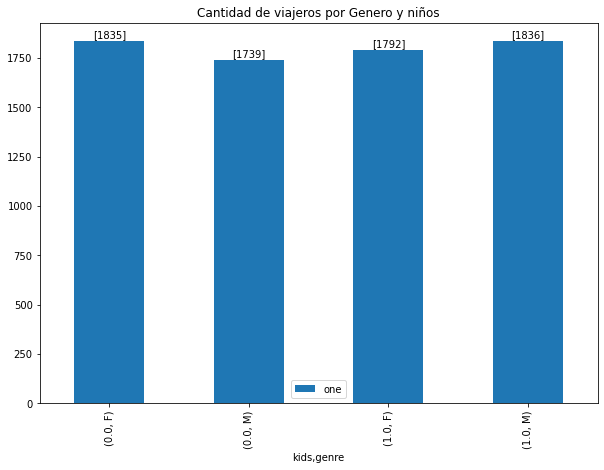

In [92]:
data_viz = df
data_viz = data_viz.dropna()

data_viz['one'] = 1
data_viz_by_genre_and_kids = data_viz[['genre', 'kids', 'one']].groupby(['kids', 'genre']).sum()
labels = data_viz_by_genre_and_kids.values.tolist()
ax = data_viz_by_genre_and_kids.plot(kind='bar', figsize=(10,7))
plt.title('Cantidad de viajeros por Genero y niños')

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

In [93]:
data_viz_by_genre_and_kids

one
kids genre      
0.0  F      1835
     M      1739
1.0  F      1792
     M      1836

Del gráfico de los viajeros que tienen y no tienen hijos, podemos observar que los datos son más o menos similares, la diferenciar entre el menor y el mayor es de 97 unidades. Lo cual, según la escala no parece ser una gran diferencia.

### ¿Cuál es el país al que más viajan?

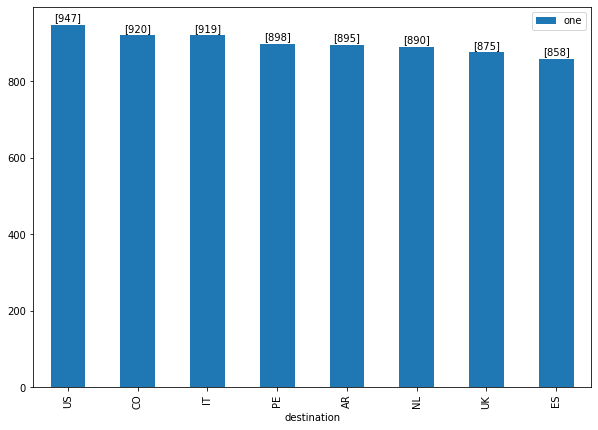

In [94]:
data_viz_world = data_viz[['destination', 'one']]

ax = data_viz_world.groupby('destination').sum().sort_values('one', ascending=False).plot(kind='bar', figsize=(10,7))
labels = data_viz_world.groupby('destination').sum().sort_values('one', ascending=False).values.tolist()

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

Podemos ver que los países están más o menos con una distribución similar, la diferencia entre los 2 extremos son 89 personas, lo cual para la distribución en general no es mucha diferencia.

También podemos observar que los 3 países con más visitas son Estados Unidos, Colombia e Italia.

### ¿Cuál es el país al que más viajan cuando se tiene hijos y en qué tipo de acomodación se hospedan? y ¿Cuál es el país al que más viajan cuando NO se tiene hijos y en qué tipo de acomodación se hospedan?

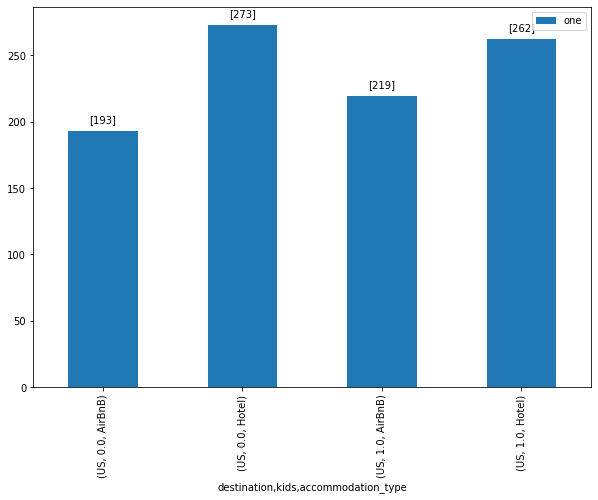

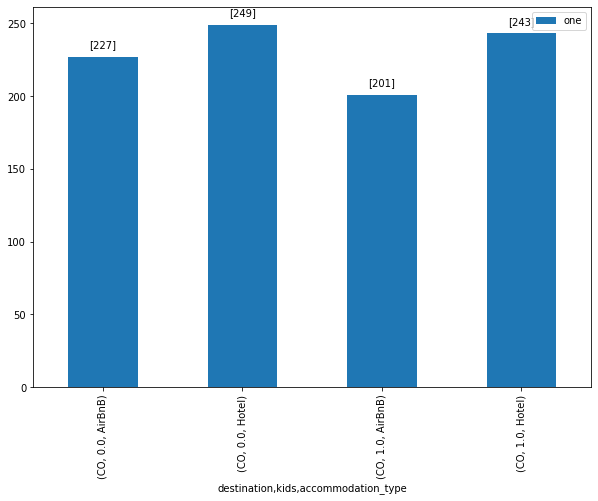

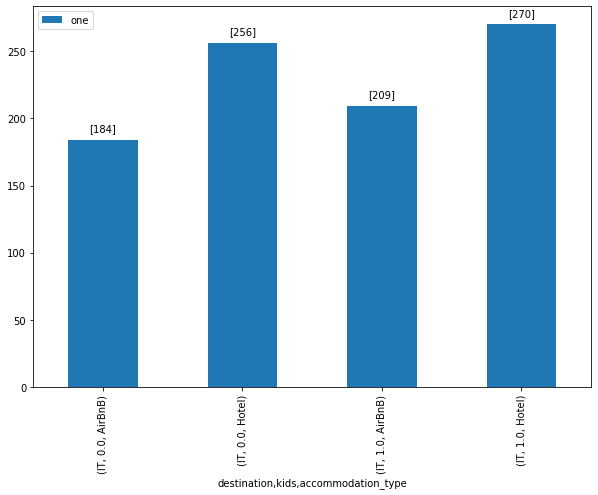

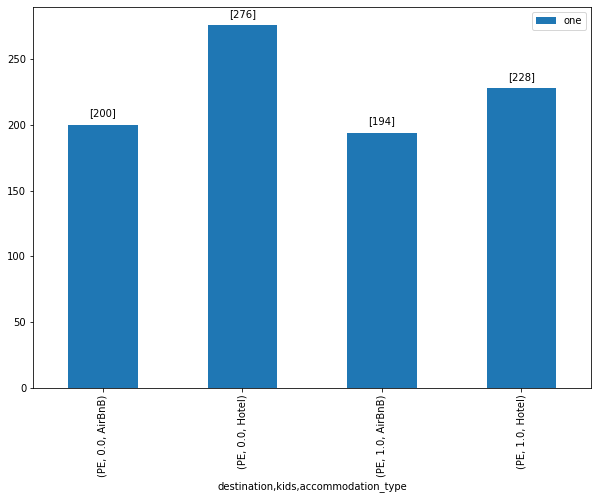

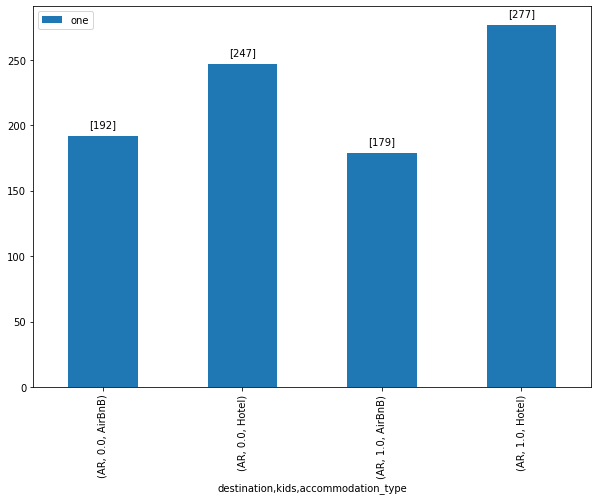

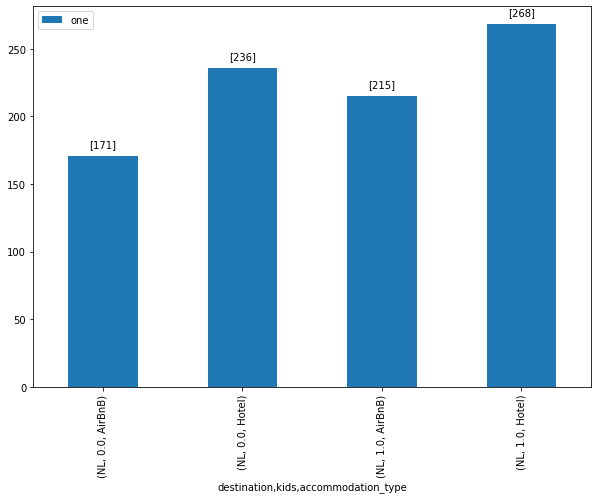

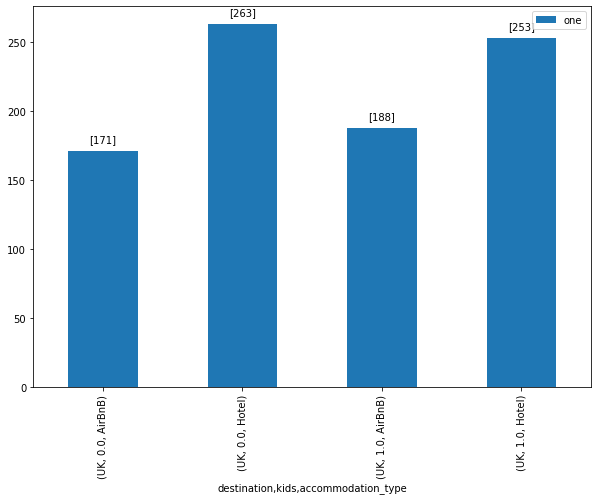

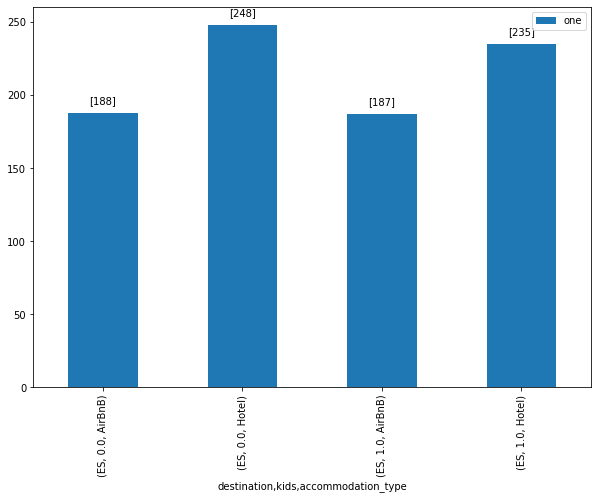

In [95]:
data_viz_world = data_viz[['destination', 'kids', 'accommodation_type', 'one']]

country_list = ['US', 'CO', 'IT', 'PE', 'AR', 'NL', 'UK', 'ES']
data_viz_world = data_viz_world.groupby(['destination', 'kids', 'accommodation_type']).sum().sort_values('destination', ascending=False)

data_viz_world = data_viz_world.reset_index()
for country in country_list:
    country = data_viz_world[data_viz_world['destination'] == country]
    ax = country.groupby(['destination', 'kids', 'accommodation_type']).sum().sort_values('destination', ascending=False)
    labels = ax.values.tolist()
    ax = ax.plot(kind='bar', figsize=(10,7))
    
    rects = ax.patches
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom')
plt.show()

Al analizar más detalladamente el tipo de acomodación por cada país y sin discriminar si se tienen o no se tienen hijos, se puede ver una tendencia muy marcada, la mayoría de los viajeros, ya sea que tengan hijos o no, prefiere hospedarse más en hoteles que a través de AirBnB.

### ¿Cuál es la distribución de edades de los viajeros?

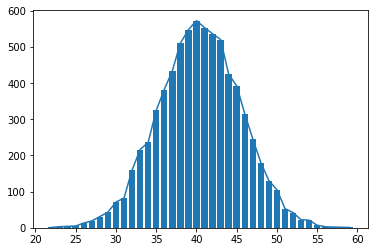

In [96]:
data_viz_by_age = data_viz[['age', 'one']]

ages = sorted(data_viz_by_age['age'].unique())
data_viz_by_age = data_viz_by_age.groupby('age').sum()
values = data_viz_by_age.values
ammount = []
for value in values:
    ammount.append(int(value))
plt.plot(data_viz_by_age)
plt.bar(ages, ammount)
plt.rcParams["figure.figsize"] = (5,15)
plt.show()

Al visualizar cómo están distribuidas las edades, podemos inferir que su comportamiento es similar al de una distribución normal, puesto que se asemejan al de una campana.

De esto, podemos concluir que los que más viajan su edad está comprendida entre los 35 a 45 años, siendo los de 40 años los que más viajan.

## Continuamos con la preparación de los datos para el data engineering y posterior modelamiento de datos

In [97]:
# Convertiremos el genero en un tipo booleano, 0 si es masculino, 1 si es femenino, 
# lo mismo haremos con accommodation type, 0 si es hotel, 1 si es AirBnB.
# Podemos hacer la conversión directamente, pues de la descripción de los datos, sabemos que solo hay 2 de este tipo.
df['genre'] = df['genre'].apply(lambda x: 0 if x == 'M' else 1)
df['accommodation_type'] = df['accommodation_type'].apply(lambda x: 0 if x == 'Hotel' else 1)
df.head(10)

,days_of_stay,genre,age,kids,destination,accommodation_type
0,7.0,1,40.0,0.0,CO,1
1,5.0,0,NaN,0.0,NaN,1
2,4.0,1,39.0,1.0,ES,0
3,5.0,1,45.0,0.0,NL,0
4,5.0,0,45.0,1.0,UK,0
5,7.0,1,47.0,1.0,IT,1
6,3.0,1,53.0,0.0,NL,0
7,2.0,1,47.0,0.0,AR,0
8,3.0,0,39.0,1.0,CO,1
9,5.0,1,31.0,NaN,AR,1


A continuación, se guardará un array con los países de destino de los viajeros, con el fin de convertirlos en valores numéricos según sea su índice, y así facilitar el modelamiento de datos.

In [98]:
country_list = df['destination'].unique()
print(country_list)
print(np.where(country_list == 'NL')[0][0])
np.nan

['CO' nan 'ES' 'NL' 'UK' 'IT' 'AR' 'PE' 'US']
3


nan

In [99]:
# Finalmente, eliminamos los datos nulos, puesto que haciendo pruebas con el modelo de entrenamiento del árbol de decisión, 
# para que este sea efectivo, no debe contener valores nulos.
# Debido a que si se entrena el modelo con el siguiente manejo de datos se obtienen valores del 73%, se procede a eliminar los valores nulos,
# puesto que, de esta manera la precisión aumenta al 83%
"""df['days_of_stay'] = df['days_of_stay'].fillna(df['days_of_stay'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['genre'] = df['genre'].fillna(method='ffill')
df['kids'] = df['kids'].fillna(method='ffill')
df['destination'] = df['destination'].fillna(method='ffill')
df.head()"""

# Eliminando valores nulos
df = df.dropna()
df.head()

,days_of_stay,genre,age,kids,destination,accommodation_type
0,7.0,1,40.0,0.0,CO,1
2,4.0,1,39.0,1.0,ES,0
3,5.0,1,45.0,0.0,NL,0
4,5.0,0,45.0,1.0,UK,0
5,7.0,1,47.0,1.0,IT,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7202 entries, 0 to 9867
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   days_of_stay        7202 non-null   float64
 1   genre               7202 non-null   int64  
 2   age                 7202 non-null   float64
 3   kids                7202 non-null   float64
 4   destination         7202 non-null   object 
 5   accommodation_type  7202 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 393.9+ KB


In [101]:
country_list = df['destination'].unique()
print(country_list)
df.head(5)

['CO' 'ES' 'NL' 'UK' 'IT' 'AR' 'PE' 'US']


,days_of_stay,genre,age,kids,destination,accommodation_type
0,7.0,1,40.0,0.0,CO,1
2,4.0,1,39.0,1.0,ES,0
3,5.0,1,45.0,0.0,NL,0
4,5.0,0,45.0,1.0,UK,0
5,7.0,1,47.0,1.0,IT,1


In [102]:
country_list = ['AR', 'CO', 'ES', 'IT', 'NL', 'PE', 'UK', 'US']
df[country_list] = pd.get_dummies(df.destination)
df

,days_of_stay,genre,age,kids,destination,accommodation_type,AR,CO,ES,IT,NL,PE,UK,US
0,7.0,1,40.0,0.0,CO,1,0,1,0,0,0,0,0,0
2,4.0,1,39.0,1.0,ES,0,0,0,1,0,0,0,0,0
3,5.0,1,45.0,0.0,NL,0,0,0,0,0,1,0,0,0
4,5.0,0,45.0,1.0,UK,0,0,0,0,0,0,0,1,0
5,7.0,1,47.0,1.0,IT,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2.0,1,42.0,0.0,ES,1,0,0,1,0,0,0,0,0
9864,6.0,0,43.0,1.0,PE,1,0,0,0,0,0,1,0,0
9865,4.0,0,39.0,0.0,IT,0,0,0,0,1,0,0,0,0
9866,3.0,0,37.0,1.0,IT,0,0,0,0,1,0,0,0,0


In [103]:
bool_columns = ['genre', 'kids', 'accommodation_type']
df[bool_columns] = df[bool_columns].astype(float)

In [104]:
df.dtypes

days_of_stay          float64
genre                 float64
age                   float64
kids                  float64
destination            object
accommodation_type    float64
AR                      uint8
CO                      uint8
ES                      uint8
IT                      uint8
NL                      uint8
PE                      uint8
UK                      uint8
US                      uint8
dtype: object

# **Modelamiento:** 
usar modelos integrados en [Sklearn](https://scikit-learn.org/stable/) y optimizar para encontrar el mejor rendimiento.

Para este proceso es fundamental dividir el data set en training/validation/test y elegir una métrica de comparación.

## Árbol de decisión

Los árboles de decisión son una técnica de aprendizaje automático supervisado muy utilizada en muchos negocios. Como su nombre indica, esta técnica de machine learning toma una serie de decisiones en forma de árbol. Los árboles de decisión pueden usarse para resolver problemas tanto de clasificación como de regresión.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

A continuación vamos a generar una lista con los nombres de las columnas que van a servir de entrenamiento y otra con los valores de salida.

In [106]:
feature_cols = ['days_of_stay', 'genre', 'age', 'kids', 'CO', 'ES', 'NL', 'UK', 'IT', 'AR', 'PE', 'US']
x = df[feature_cols]
x = x.values.tolist()
y = df.accommodation_type
y = y.values.tolist()

In [107]:
x[0:5]

[[7.0, 1.0, 40.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [4.0, 1.0, 39.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [5.0, 1.0, 45.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [5.0, 0.0, 45.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [7.0, 1.0, 47.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]

In [108]:
y[0:5]

[1.0, 0.0, 0.0, 0.0, 1.0]

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [110]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [111]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [112]:
predict = tree.predict(X_test)
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [113]:
np.unique(predict)

array([0., 1.])

In [114]:
tree_one_accuracy = round(tree.score(X_test,Y_test), 4)
tree_one_accuracy

0.5536

In [115]:
print(f"""
Exactitud: {metrics.accuracy_score(Y_test, predict)}
Precisión: {metrics.precision_score(Y_test, predict)}
Sensibilidad: {metrics.recall_score(Y_test, predict)}
Puntaje F1: {metrics.f1_score(Y_test, predict)}
""")


Exactitud: 0.5535813436979455
Precisión: 0.5
Sensibilidad: 0.0024875621890547263
Puntaje F1: 0.00495049504950495



### Normalizando el dataframe



In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [117]:
tree.fit(x_train_scaled, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [118]:
predict = tree.predict(x_test_scaled)
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [119]:
np.unique(predict)

array([0., 1.])

In [120]:
tree_one_accuracy = round(tree.score(x_test_scaled,Y_test), 4)
tree_one_accuracy

0.5536

# Utilizando Keras

Dado que la precisión aún sigue siendo baja, procederemos a utilizar otro modelo. Utilizaremos Keras para crear la red neuronal.

## ¿Por qué realice el cambio a Keras?

Keras ofrece una simplicidad enorme para crear redes neuronales, el código es más limpio y relativamente fácil de implementar. También, las redes neuronales aprenden con una mayor facilidad que con los modelos ya establecidos en SciKit Learn, esto puede hacer que el accuracy (precisión) de los modelos aumente drásticamente, y no resulten con el actual accuracy de apróximadamente 50%.

In [121]:
from keras.models import Sequential
from keras.layers import Dense

In [122]:
x = df[feature_cols]
y = df['accommodation_type']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [124]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2021)

In [125]:
model = Sequential()
model.add(Dense(256, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200, batch_size=128)

Epoch 1/200
38/38 [==============================] - 2s 18ms/step - loss: 0.9388 - accuracy: 0.5266 - mse: 0.3193 - val_loss: 0.7694 - val_accuracy: 0.3863 - val_mse: 0.2873
Epoch 2/200
38/38 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.5010 - mse: 0.2616 - val_loss: 0.6686 - val_accuracy: 0.6137 - val_mse: 0.2378
Epoch 3/200
38/38 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.5463 - mse: 0.2516 - val_loss: 0.6808 - val_accuracy: 0.6026 - val_mse: 0.2439
Epoch 4/200
38/38 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5666 - mse: 0.2469 - val_loss: 0.6797 - val_accuracy: 0.6137 - val_mse: 0.2426
Epoch 5/200
38/38 [==============================] - 0s 6ms/step - loss: 0.7036 - accuracy: 0.5346 - mse: 0.2547 - val_loss: 0.6859 - val_accuracy: 0.5656 - val_mse: 0.2464
Epoch 6/200
38/38 [==============================] - 0s 6ms/step - loss: 0.7009 - accuracy: 0.5474 - mse: 0.2530 - val_loss: 0.6748 - 

In [127]:
result = model.evaluate(X_test, Y_test)
 
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",
 
str(round(result[i],2)))



57/57 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.8251 - mse: 0.1418
Metric  loss : 0.46
Metric  accuracy : 0.83
Metric  mse : 0.14


In [128]:
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4768 - accuracy: 0.7936 - mse: 0.1526 - val_loss: 0.4854 - val_accuracy: 0.7940 - val_mse: 0.1546
Epoch 2/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.7798 - mse: 0.1588 - val_loss: 0.4818 - val_accuracy: 0.8151 - val_mse: 0.1508
Epoch 3/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4710 - accuracy: 0.7992 - mse: 0.1503 - val_loss: 0.4828 - val_accuracy: 0.7857 - val_mse: 0.1539
Epoch 4/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4777 - accuracy: 0.7916 - mse: 0.1534 - val_loss: 0.5058 - val_accuracy: 0.7729 - val_mse: 0.1640
Epoch 5/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4728 - accuracy: 0.7969 - mse: 0.1510 - val_loss: 0.4613 - val_accuracy: 0.8145 - val_mse: 0.1434
Epoch 6/50
152/152 [==============================] - 1s 4ms/step - loss: 0.4568 - accuracy: 0.8138 - mse: 0.1442 - val_loss: 0.49

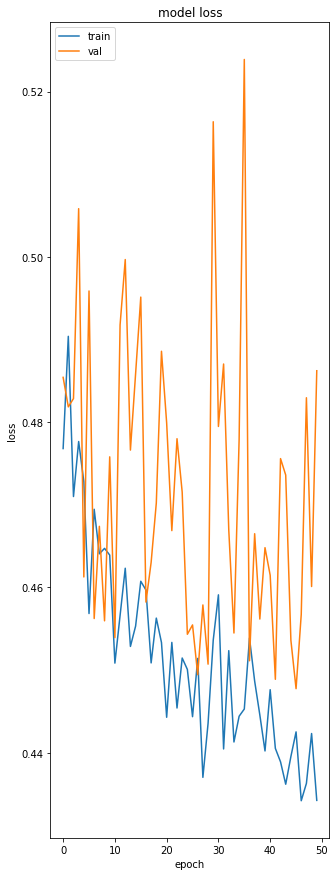

In [129]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
plot_history(history)



In [130]:
model.predict(X_test)

array([[0.08595443],
       [0.8704946 ],
       [0.79572606],
       ...,
       [0.7861019 ],
       [0.0416666 ],
       [0.17183271]], dtype=float32)

In [131]:
# Guardando el modelo.
model.save("prediction_model.h5")
print('Modelo almacenado correctamente.')

Modelo almacenado correctamente.


# Implementación: 
Aplicar el algoritmo que mejor rendimiento tiene sobre el data set, con su debida justificación, en el data set adicional DataAcomodacion.csv (que no debe ser usado en ningún momento en la parte de entrenamiento del modelo).

In [132]:
# Cargando el modelo
from keras.models import load_model

In [133]:
model = load_model('prediction_model.h5', compile=True)
print('Modelo cargado correctamente.')

Modelo cargado correctamente.


In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


In [135]:
%ls

clean_data.csv       prediction_model.h5              train_data.txt
DataAcomodacion.csv  prediction_Tipo_Acomodacion.csv


In [136]:
df_acomodacion = pd.read_csv('DataAcomodacion.csv', encoding = "ISO-8859-1")
df_acomodacion.head()

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1013321,2,F,38.0,0.0,US,NaN
1,1009487,6,M,37.0,0.0,ES,NaN
2,1002727,1,M,37.0,1.0,ES,NaN
3,1001135,5,F,50.0,0.0,UK,NaN
4,1000796,4,F,42.0,1.0,AR,NaN


In [137]:
df_acomodacion['duracion_estadia'] = df_acomodacion['duracion_estadia'].fillna(df_acomodacion['duracion_estadia'].median())
df_acomodacion['genero'] = df_acomodacion['genero'].fillna(method = 'bfill')
df_acomodacion['edad'] = df_acomodacion['edad'].fillna(df_acomodacion['edad'].median())
df_acomodacion['niños'] = df_acomodacion['niños'].fillna(df_acomodacion['niños'].median())
df_acomodacion['codigo_destino'] = df_acomodacion['codigo_destino'].fillna(method = 'bfill')
df_acomodacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4229 non-null   int64  
 1   duracion_estadia  4229 non-null   int64  
 2   genero            4229 non-null   object 
 3   edad              4229 non-null   float64
 4   niños             4229 non-null   float64
 5   codigo_destino    4229 non-null   object 
 6   tipo_acomodacion  0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 231.4+ KB


In [138]:
df_acomodacion.drop(df_acomodacion[['id']], axis=1, inplace = True)
df_validation = df_acomodacion

In [139]:
df_validation['genero'] = df_validation['genero'].apply(lambda x: 0 if x == 'M' else 1)
df_validation[country_list] = pd.get_dummies(df_validation.codigo_destino)
df_validation

,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion,AR,CO,ES,IT,NL,PE,UK,US
0,2,1,38.0,0.0,US,NaN,0,0,0,0,0,0,0,1
1,6,0,37.0,0.0,ES,NaN,0,0,1,0,0,0,0,0
2,1,0,37.0,1.0,ES,NaN,0,0,1,0,0,0,0,0
3,5,1,50.0,0.0,UK,NaN,0,0,0,0,0,0,1,0
4,4,1,42.0,1.0,AR,NaN,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,3,0,41.0,0.0,ES,NaN,0,0,1,0,0,0,0,0
4225,4,1,35.0,1.0,NL,NaN,0,0,0,0,1,0,0,0
4226,7,1,41.0,1.0,PE,NaN,0,0,0,0,0,1,0,0
4227,4,0,48.0,0.0,UK,NaN,0,0,0,0,0,0,1,0


In [140]:
feature_cols = ['duracion_estadia', 'genero', 'edad', 'niños', 'AR', 'CO', 'ES', 'IT', 'NL', 'PE', 'UK', 'US']
df_validation = df_validation[feature_cols]
df_validation

,duracion_estadia,genero,edad,niños,AR,CO,ES,IT,NL,PE,UK,US
0,2,1,38.0,0.0,0,0,0,0,0,0,0,1
1,6,0,37.0,0.0,0,0,1,0,0,0,0,0
2,1,0,37.0,1.0,0,0,1,0,0,0,0,0
3,5,1,50.0,0.0,0,0,0,0,0,0,1,0
4,4,1,42.0,1.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4224,3,0,41.0,0.0,0,0,1,0,0,0,0,0
4225,4,1,35.0,1.0,0,0,0,0,1,0,0,0
4226,7,1,41.0,1.0,0,0,0,0,0,1,0,0
4227,4,0,48.0,0.0,0,0,0,0,0,0,1,0


In [141]:
predictions = model.predict(df_validation)
predictions[0:10]

array([[0.74920166],
       [0.02958006],
       [0.9378363 ],
       [0.06311545],
       [0.84216523],
       [0.5290427 ],
       [0.4149786 ],
       [0.11882514],
       [0.15835443],
       [0.18139052]], dtype=float32)

In [142]:
result = []
for predict in predictions:
    if predict <= 0.5:
        result.append('Hotel')
    else:
        result.append('AirBnB')

result[0:10]

['AirBnB',
 'Hotel',
 'AirBnB',
 'Hotel',
 'AirBnB',
 'AirBnB',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel']

In [143]:
df_acomodacion['tipo_acomodacion'] = result
df_acomodacion

,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion,AR,CO,ES,IT,NL,PE,UK,US
0,2,1,38.0,0.0,US,AirBnB,0,0,0,0,0,0,0,1
1,6,0,37.0,0.0,ES,Hotel,0,0,1,0,0,0,0,0
2,1,0,37.0,1.0,ES,AirBnB,0,0,1,0,0,0,0,0
3,5,1,50.0,0.0,UK,Hotel,0,0,0,0,0,0,1,0
4,4,1,42.0,1.0,AR,AirBnB,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,3,0,41.0,0.0,ES,Hotel,0,0,1,0,0,0,0,0
4225,4,1,35.0,1.0,NL,Hotel,0,0,0,0,1,0,0,0
4226,7,1,41.0,1.0,PE,AirBnB,0,0,0,0,0,1,0,0
4227,4,0,48.0,0.0,UK,AirBnB,0,0,0,0,0,0,1,0


In [144]:
feature_cols = ['duracion_estadia', 	'genero', 	'edad', 	'niños', 	'codigo_destino', 	'tipo_acomodacion']
df_acomodacion = df_acomodacion[feature_cols]
df_acomodacion

,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,2,1,38.0,0.0,US,AirBnB
1,6,0,37.0,0.0,ES,Hotel
2,1,0,37.0,1.0,ES,AirBnB
3,5,1,50.0,0.0,UK,Hotel
4,4,1,42.0,1.0,AR,AirBnB
...,...,...,...,...,...,...
4224,3,0,41.0,0.0,ES,Hotel
4225,4,1,35.0,1.0,NL,Hotel
4226,7,1,41.0,1.0,PE,AirBnB
4227,4,0,48.0,0.0,UK,AirBnB


In [145]:
df_acomodacion['genero'] = df_acomodacion['genero'].apply(lambda x: 'M' if x == 0 else 'F')
df_acomodacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,2,F,38.0,0.0,US,AirBnB
1,6,M,37.0,0.0,ES,Hotel
2,1,M,37.0,1.0,ES,AirBnB
3,5,F,50.0,0.0,UK,Hotel
4,4,F,42.0,1.0,AR,AirBnB
...,...,...,...,...,...,...
4224,3,M,41.0,0.0,ES,Hotel
4225,4,F,35.0,1.0,NL,Hotel
4226,7,F,41.0,1.0,PE,AirBnB
4227,4,M,48.0,0.0,UK,AirBnB


In [146]:
df_acomodacion.to_csv('prediction_Tipo_Acomodacion.csv')

# **Deployment:** 
Integrar la solución de DS en una aplicación web, usando el framework de elección.

 *El frontend no es parte de la evaluación del proyecto y puede ser tan básica como sea necesario.*

In [154]:
def predict(data):
    """
    The data that we need to enter into this function has to be on this same order
    days_of_stay, genre, age, kids, destination code.
    This function returns a string, and it determines if the accomodation type is either Hotel or AirBnB.
    """
    model = load_model('prediction_model.h5', compile=True)

    country_list = ['AR', 'CO', 'ES', 'IT', 'NL', 'PE', 'UK', 'US']
    array = []
    for value in data:
        if value != data[-1]:
            array.append(int(value))
        else:
            for country in country_list:
                if data[-1] != country:
                    array.append(0)
                else:
                    array.append(1)
    
    result = model.predict(pd.DataFrame(array).T)
    
    if result <= 0.5:
        return 'Hotel'
    else:
        return 'AirBnB'

In [156]:
predict([2, 1, 29, 0, 'CO'])

'AirBnB'